<h2>Data Analysis & Visualization - CA1</h2>

<h5>Data Selection</h5>

<h7>The Dataset has been sourced from - https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?rvi=1</h7>


In [89]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.linear_model import LinearRegression, Ridge
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr


In [75]:
cwd = os.getcwd()
os.chdir("D:/Year 4/DAV/DAV-CA1")
data = pd.read_csv("uk_car_dataset.csv")
print(data.isnull().sum())
print(data)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
           model  year  price transmission  mileage fuelType  tax   mpg  \
0         Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1          Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2          Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3         Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4         Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...          ...   ...    ...          ...      ...      ...  ...   ...   
99182         X3  2016  19000    Automatic    40818   Diesel  150  54.3   
99183   5 Series  2016  14600    Automatic    42947   Diesel  125  60.1   
99184   3 Series  2017  13100       Manual    25468   Petrol  200  42.8   
99185   1 Series  2014   9930    Automatic    45000   Diesel   30  64.2   


<h5>Imputation Of Missing Data</h5>
If your data is not complete you will need to infer values to complete the dataset.

In [54]:
print("Before --------------------------")
print(data.isnull().sum())

imputers = {
    'price': SimpleImputer(strategy='median'),
    'year': SimpleImputer(strategy='most_frequent'),
    'transmission': SimpleImputer(strategy='most_frequent'),
    'mileage': SimpleImputer(strategy='median'),
    'fuelType': SimpleImputer(strategy='most_frequent'),
    'tax': SimpleImputer(strategy='mean'),
    'mpg': KNNImputer(n_neighbors=5),
    'engineSize': KNNImputer(n_neighbors=5)
}

for col, imputer in imputers.items():
    if col == 'model':
        data[col]
    else:
        imputed_data = imputer.fit_transform(data[col].values.reshape(-1, 1))
        data[col] = imputed_data.squeeze()

print("After --------------------------")
print(data.isnull().sum())

print("Data --------------------------")
print(data)

Before --------------------------
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
After --------------------------
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
Data --------------------------
           model  year    price transmission  mileage fuelType    tax   mpg  \
0       5 Series  2014  11200.0    Automatic  67068.0   Diesel  125.0  57.6   
1       6 Series  2018  27000.0    Automatic  14827.0   Petrol  145.0  42.8   
2       5 Series  2016  16000.0    Automatic  62794.0   Diesel  160.0  51.4   
3       1 Series  2017  12750.0    Automatic  26676.0   Diesel  145.0  72.4   
4       7 Series  2014  14500.0    Automatic  39554.0   Diesel  160.0  50.4   
...          ...   ...      ...          ...      ...      ...    ...   ...  

In [51]:
print(data)

      model  year    price transmission  mileage fuelType    tax   mpg  \
0        A1  2017  12500.0       Manual  15735.0   Petrol  150.0  55.4   
1        A6  2016  16500.0    Automatic  36203.0   Diesel   20.0  64.2   
2        A1  2016  11000.0       Manual  29946.0   Petrol   30.0  55.4   
3        A4  2017  16800.0    Automatic  25952.0   Diesel  145.0  67.3   
4        A3  2019  17300.0       Manual   1998.0   Petrol  145.0  49.6   
...     ...   ...      ...          ...      ...      ...    ...   ...   
10663    A3  2020  16999.0       Manual   4018.0   Petrol  145.0  49.6   
10664    A3  2020  16999.0       Manual   1978.0   Petrol  150.0  49.6   
10665    A3  2020  17199.0       Manual    609.0   Petrol  150.0  49.6   
10666    Q3  2017  19499.0    Automatic   8646.0   Petrol  150.0  47.9   
10667    Q3  2016  15999.0       Manual  11855.0   Petrol  150.0  47.9   

       engineSize  
0             1.4  
1             2.0  
2             1.4  
3             2.0  
4          

<h5>Normalisation</h5>
In order to compare variables you will need to normalise them. Choose an appropriate
normalisation.

<h5>Multivariate Analysis</h5>
Analyse and report on the structure of the data. Decide what are the most important
variables and what should be excluded from the index.

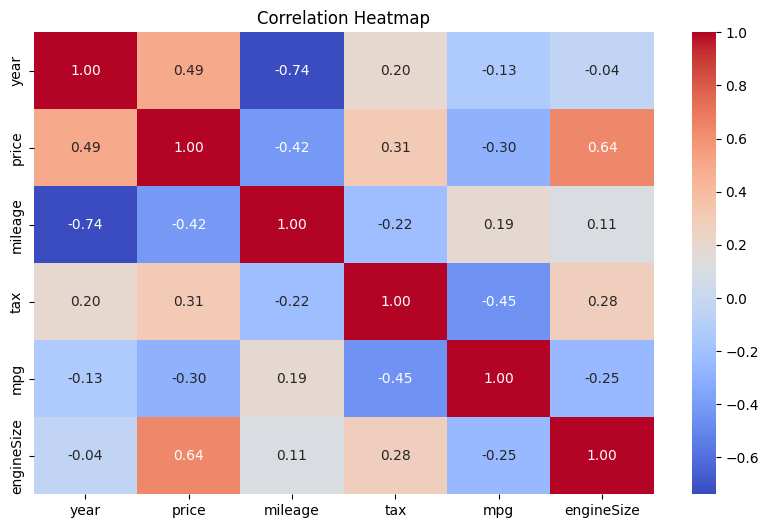

Dependent Variable (DV): price
Independent Variables (IVs): ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


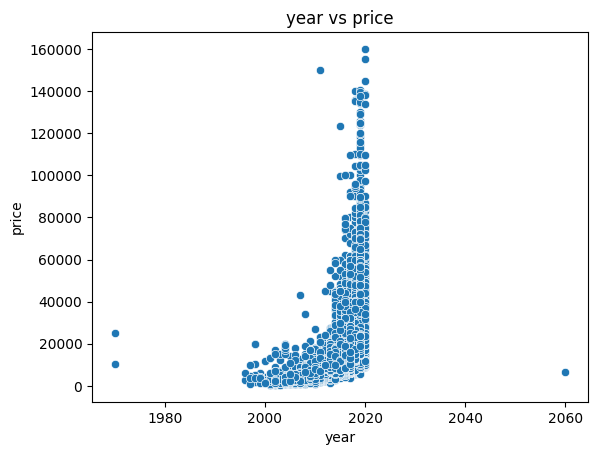

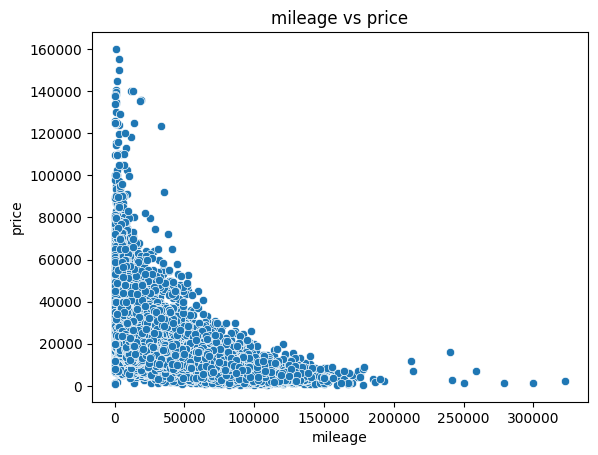

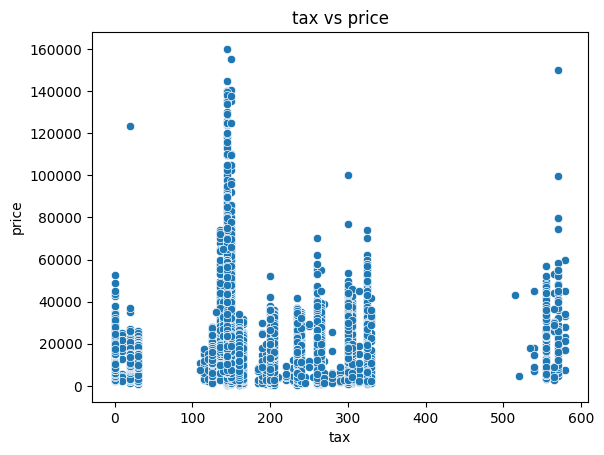

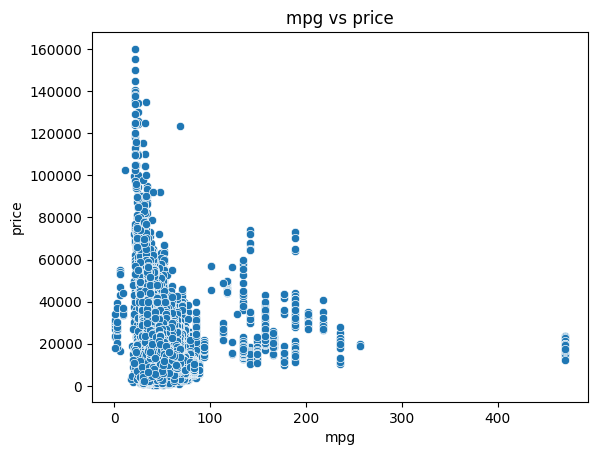

In [77]:
df = pd.DataFrame(data)
df = df.drop(['model'], axis=1)
df = df.drop(['transmission'], axis=1)
df = df.drop(['fuelType'], axis=1)

# 1. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 2. Determining DV and IVs
DV = 'price'
IVs = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']

print("Dependent Variable (DV):", DV)
print("Independent Variables (IVs):", IVs)

# 3. Plotting
plt.figure()
sns.scatterplot(data=df, x='year', y='price')
plt.title(f'year vs price')
plt.show()

plt.figure()
sns.scatterplot(data=df, x='mileage', y='price')
plt.title(f'mileage vs price')
plt.show()

plt.figure()
sns.scatterplot(data=df, x='tax', y='price')
plt.title(f'tax vs price')
plt.show()

plt.figure()
sns.scatterplot(data=df, x='mpg', y='price')
plt.title(f'mpg vs price')
plt.show()

In [72]:
# 4. Pearson correlation and p-value
correlations = {}
p_values = {}
for col in df.columns:
    if df[col].dtype != 'object' and col != 'price':
        corr, p_val = pearsonr(df[col], df['price'])
        correlations[col] = corr
        p_values[col] = p_val

print("Correlations:")
for col, corr in correlations.items():
    print(f"{col}: {corr:.2f}")

print("\nP-values:")
for col, p_val in p_values.items():
    print(f"{col}: {p_val:.4f}")

# 5. Determining what to drop
df = df.drop(['mpg'], axis=1)
df = df.drop(['mileage'], axis=1)

Correlations:
year: 0.61
mileage: -0.52
tax: 0.48
mpg: -0.50
engineSize: 0.58

P-values:
year: 0.0000
mileage: 0.0000
tax: 0.0000
mpg: 0.0000
engineSize: 0.0000


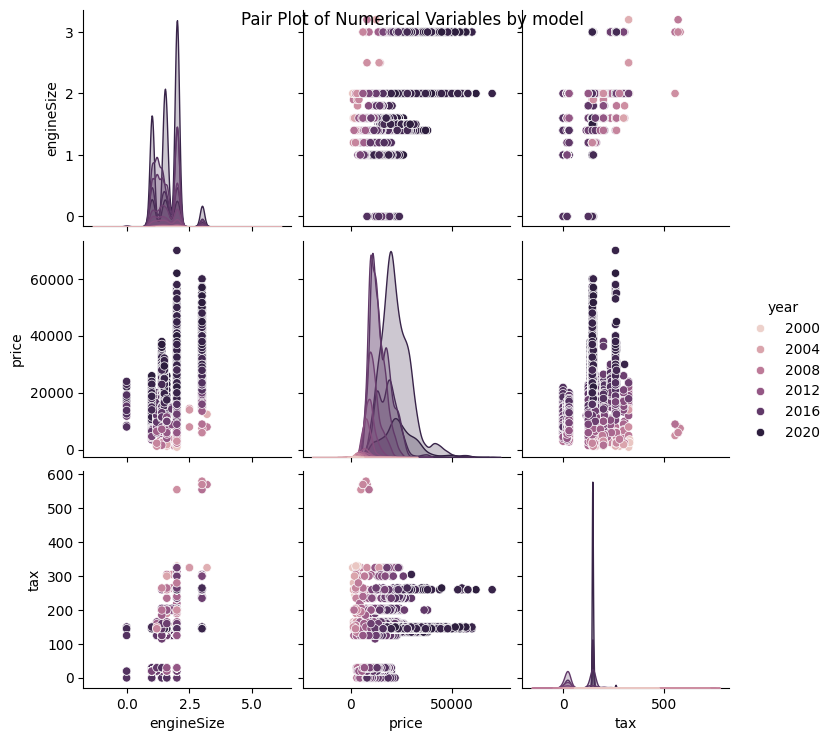

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


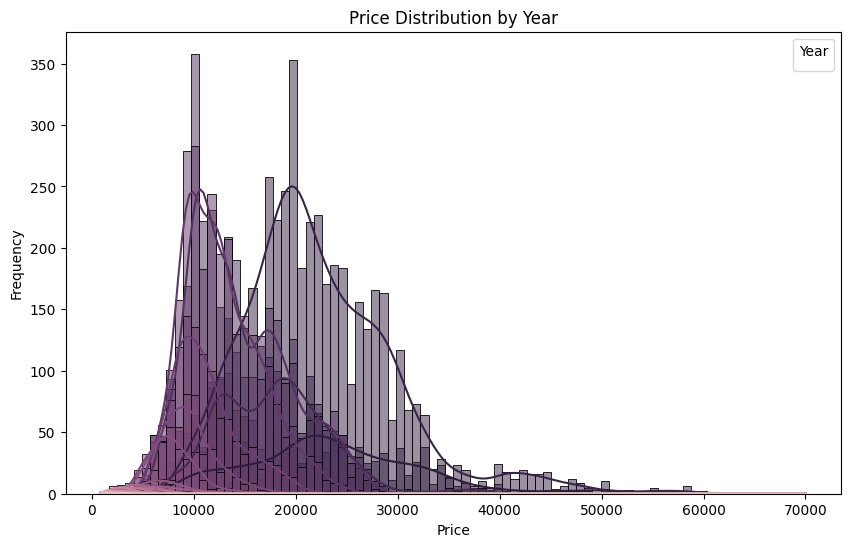

In [73]:
sns.pairplot(df, vars=['engineSize', 'price', 'tax'], hue='year')
plt.suptitle('Pair Plot of Numerical Variables by model')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', hue='year', kde=True)
plt.title('Price Distribution by Year')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend(title='Year', loc='upper right')
plt.show()

PCA

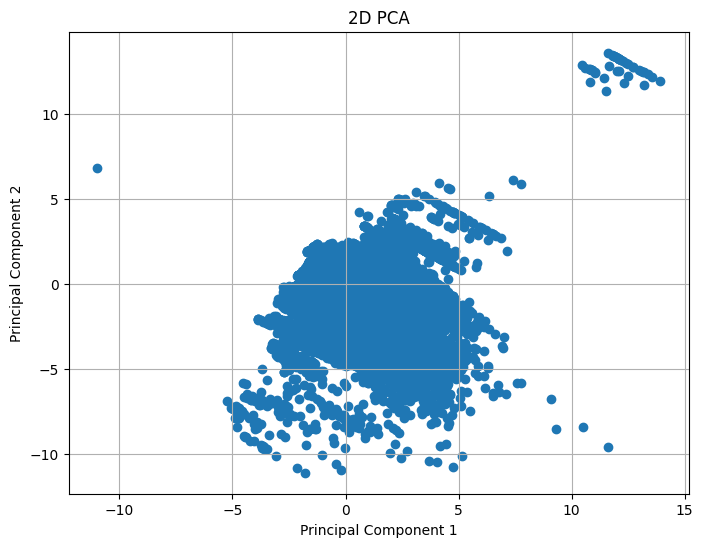

In [101]:
df = pd.DataFrame(data)

features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

x = df.loc[:, features].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, df[['price']]], axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(finalDf['PC1'], finalDf['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.grid(True)
plt.show()

Linear Regression

In [98]:
df = pd.DataFrame(data)

X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 29938179.94952873
R-squared (R2) Score: 0.7042545313853203


<h5>Weighting and Aggregation</h5>


<h5>Uncertainty and Sensitivity Analysis</h5>


<h5>Links to Other Indicators</h5>


<h5>Visualisation Of the Results</h5>
